In [62]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [63]:
def isFloat(s):
    try:
        float(s)
        return True
    except ValueError:
        #print("Value error: ",s)
        return False

with open("Log-batteryusage.csv") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    num_iters = len(data)-1
    num_nodes = len(data[0])-1
    batteryLevels = [x[:] for x in [[0.0] * num_nodes] * num_iters]
    print(num_nodes)

    for i in range(0,num_iters-1):
        for j in range(1,num_nodes):
            
            if(isFloat(data[i][j])):
                try:
                    batteryLevels[i][j-1] = float(data[i][j])
                except IndexError:
                    print(i,j)

2001


batteryFreq = [[0]*10]*199
for row_num in range(0,199):
    for col in range(0,10):
        ind = int(batteryLevels[row_num ][col]/10)
        batteryFreq[row_num ][ind] += 1

In [64]:
batteryFreq = [[0]*10 for _ in range(200)]
for row_num in range(0,num_iters):
    for col in range(0,num_nodes-1):
        ind = int(batteryLevels[row_num][col+1]/10)
        temp = batteryFreq[row_num][ind] + 1
        batteryFreq[row_num][ind] = temp

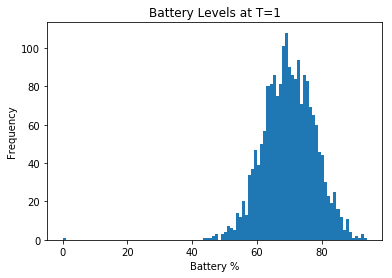

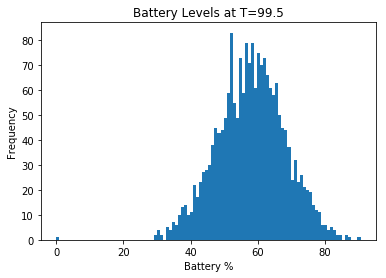

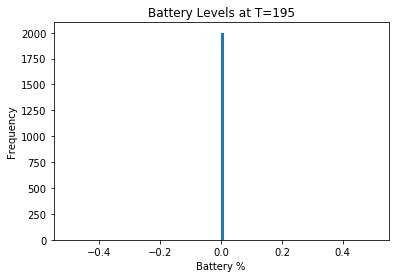

In [68]:
plt.hist(batteryLevels[1][1:], bins=100)
plt.title("Battery Levels at T=1")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[int(num_iters/2)][1:], bins=100)
middle = str(num_iters/2)
plt.title("Battery Levels at T="+middle)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[num_iters-1][1:], bins=100)
end = str(num_iters-4)
plt.title("Battery Levels at T="+end)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

In [69]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 400))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [0,10,20,30,40,50,60,70,80,90]
    y = batteryFreq[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=25, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#to save file:
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())

KeyboardInterrupt: 

In [ ]:
num = 0
def update_hist(num):
    plt.cla()
    plt.hist(batteryLevels[num],bins=100)
    plt.title("Battery Levels at T="+str(num))
    plt.xlabel("Battery %")
    plt.ylabel("Frequency")

fig = plt.figure()
hist = plt.hist(batteryLevels[0])

animation = animation.FuncAnimation(fig, update_hist, num_iters, fargs=(num) )
HTML(animation.to_html5_video())

In [70]:
b = [x[:] for x in [[0.0] * (num_nodes-2)] * (num_iters-1)]
for i in range(1,num_iters-1):
    b[i-1] = sorted(batteryLevels[i][:2000])
    
j=0
while batteryLevels[1][j] != 0:
    j = j+1
    
print(num_nodes)
print(j,batteryLevels[1][1990:])
print(b[0][0])

2001
2000 [57.7015, 69.2557, 67.8344, 78.3297, 69.1729, 74.7728, 73.3934, 78.81, 67.2159, 72.0658, 0.0]
43.5921


In [71]:
print("Iteration\tMin\tLowerQuartile\tUpperQuartile\t  Max")
for i in range(0,num_iters-1):
    minimum = b[i][0]
    maximum = b[i][1998]
    lowerq = b[i][499]
    upperq = b[i][1499]
    print("  ",i,"\t","\t",minimum,"\t",lowerq,"\t",upperq,"\t",maximum)

Iteration	Min	LowerQuartile	UpperQuartile	  Max
   0 	 	 43.5921 	 64.6078 	 75.3348 	 92.5288
   1 	 	 43.5721 	 64.5878 	 75.3148 	 92.5088
   2 	 	 43.5521 	 64.5678 	 75.2948 	 92.4887
   3 	 	 43.5321 	 64.5478 	 75.2625 	 92.4687
   4 	 	 43.5121 	 64.5278 	 75.2222 	 92.4487
   5 	 	 43.4922 	 64.5078 	 75.1835 	 92.4287
   6 	 	 43.4722 	 64.4878 	 75.1545 	 92.4087
   7 	 	 43.4522 	 64.4678 	 75.1296 	 92.3887
   8 	 	 43.4322 	 64.4478 	 75.0767 	 92.3687
   9 	 	 43.4122 	 64.4264 	 75.0567 	 92.3487
   10 	 	 43.3922 	 64.3632 	 74.9948 	 92.3287
   11 	 	 43.3722 	 64.3432 	 74.9595 	 92.3087
   12 	 	 43.3522 	 64.3149 	 74.9395 	 92.2887
   13 	 	 43.3322 	 64.2949 	 74.9178 	 92.2687
   14 	 	 43.3122 	 64.2719 	 74.8978 	 92.2487
   15 	 	 43.2922 	 64.2449 	 74.8495 	 92.2287
   16 	 	 43.2722 	 64.222 	 74.8255 	 92.2087
   17 	 	 43.2522 	 64.139 	 74.7655 	 92.1887
   18 	 	 43.2322 	 64.119 	 74.7254 	 92.1687
   19 	 	 43.2122 	 64.0975 	 74.6929 	 92.1487
   20